In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit as sigmoid
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
def getdata():
    global X, Y
    data = pd.read_csv("irisdata.csv")
    X = data[["sepal length", "sepal width", "petal length", "petal width"]].to_numpy()
    X = np.append(np.ones((150,1)), X, axis=1)
    Y = np.zeros((150,3))
    for i in range(150):
        if data["type"][i] == "Iris-setosa":
            Y[i][0] = 1
        if data["type"][i] == "Iris-versicolor":
            Y[i][1] = 1
        if data["type"][i] == "Iris-virginica":
            Y[i][2] = 1

In [3]:
def createsets():
    global X, Y, Xtrain, Ytrain, Xcv, Ycv, Xtest, Ytest
    randperm = np.random.permutation(range(150))
    X = X[randperm, :]
    Y = Y[randperm, :]
    Xtrain = X[0:100, :]
    Ytrain = Y[0:100, :]
    Xcv = X[100:125, :]
    Ycv = Y[100:125, :]
    Xtest = X[125:150, :]
    Ytest = Y[125:150, :]

In [30]:
def cost(X, y, theta, Lambda):
    return -1/150 * (y.T@np.log(sigmoid(X@theta)) + (1-y).T@np.log(1-sigmoid(X@theta))) + Lambda/(2*150)*np.sum(np.square(theta[1:]))

In [5]:
def gradient(X, y, Theta, Lambda):
    grad_noreg = 1/150 * X.T@(sigmoid(X@Theta)-y)
    reg = np.copy(Theta)
    reg[0] = 0
    return grad_noreg + Lambda/150 * reg

In [6]:
def gradient_descent(X, y, Lambda, Alpha, num_iters):
    global cost_history
    Theta = np.zeros((5,1))
    for _ in range(num_iters):
        cost_history.append(cost(X,y,Theta,Lambda))
        Theta = Theta - Alpha*gradient(X, y, Theta, Lambda)
    return Theta

In [7]:
def predict(X, Theta):
    return sigmoid(X@Theta)

In [8]:
def train(X, Y, Lambda, Alpha, num_iters):
    global Theta
    Theta = np.empty((5,3))
    for i in range(3):
        y = Y[:, i].reshape(100,1)
        Theta[:, i] = gradient_descent(X, y, Lambda, Alpha, num_iters).reshape(5,)

In [9]:
def calculate_output():
    global X, Theta, output
    output = np.empty((150,3))
    for i in range(3):
        output[:, i] = predict(X, Theta[:, i]).reshape(150,)
    for i in range(150):
        for j in range(3):
            output[i,j] = int(output[i,j]==np.amax(output[i,:]))

In [10]:
def evaluate():
    global Y, output
    train_mistakes = 0
    cv_mistakes = 0
    test_mistakes = 0
    for i in range(150):
        if (output[i, :] != Y[i, :]).any():
            if i in range(100):
                train_mistakes += 1
            if i in range(100, 125):
                cv_mistakes += 1
            if i in range(125, 150):
                test_mistakes += 1
    train_accuracy = 1-train_mistakes/100
    cv_accuracy = 1-cv_mistakes/25
    test_accuracy = 1-test_mistakes/25
    print("Training set accuracy: ", train_accuracy)
    print("Cross-validation set accuracy: ", cv_accuracy)
    print("Test set accuracy: ", test_accuracy)

In [51]:
getdata()
createsets()
cost_history = []
Lambda = 0
Alpha = 0.1
num_iters = 1000
train(Xtrain, Ytrain, Lambda, Alpha, num_iters)
calculate_output()
evaluate()

Training set accuracy:  0.99
Cross-validation set accuracy:  0.88
Test set accuracy:  0.92


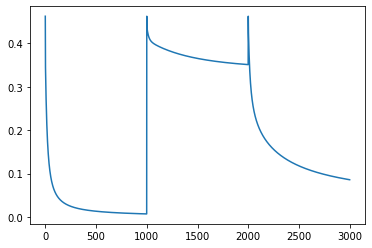

In [52]:
cost_history = np.asarray(cost_history).reshape(3*num_iters,)
plt.plot(cost_history)